In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Total Number of Crops in Karnataka Dataset

In [4]:
# Load the CSV file
df = pd.read_csv('Karnataka_Datasets/Karnataka_Dataset_Across_Regions.csv')  

# Get the number of rows
num_rows = len(df)

print(f"Number of rows: {num_rows}")

Number of rows: 138844


In [5]:
print(df.head())

  Crop_Name   Latitude  Longitude                       geometry       Name
0     Maize  12.807360  77.778923  POINT (77.7789226 12.8073603)  Bangalore
1     Maize  12.807363  77.778851  POINT (77.7788514 12.8073629)  Bangalore
2      Rose  12.742121  77.748108  POINT (77.7481075 12.7421209)  Bangalore
3      Rose  12.742126  77.748096  POINT (77.7480963 12.7421264)  Bangalore
4      Rose  12.733953  77.745245   POINT (77.745245 12.7339533)  Bangalore


# Total Number of Crops Per District in Karnataka Dataset

In [6]:
# Count the number of occurrences for each unique value in the 'Name' column
name_counts = df['Name'].value_counts()

print(name_counts)

Name
Bangalore          127111
Bangalore Rural      8590
Krishnagiri          2654
Ramanagara            489
Name: count, dtype: int64


# Count of Each Crop

In [7]:
# Count each unique Crop_Name
crop_counts = df['Crop_Name'].value_counts()

# Print all Crop_Name values and their counts without truncation
for crop, count in crop_counts.items():
    print(f"{crop}: {count}")


Ragi: 61396
Eucalyptus: 24819
Coconut: 9886
Rose: 8362
Mangoes: 5770
Arecanut: 4927
Avare: 4385
Jowar: 4305
Maize: 4086
Guava: 2919
Redgram: 2579
Sapota: 1501
Grapes: 1401
Banana: 1390
Paddy: 745
Lemon: 102
Potato: 95
Onion: 88
Black Pepper: 39
Sugarcane: 26
Bajra: 23


In [9]:
# Group by district and crop, then count
grouped = df.groupby(['Name', 'Crop_Name']).size().reset_index(name='Count')

# Loop through each district and print the crop counts
for district in grouped['Name'].unique():
    print(f"Crops in {district}:")
    district_data = grouped[grouped['Name'] == district]
    for _, row in district_data.iterrows():
        print(f"  {row['Crop_Name']}: {row['Count']}")
    print()  # Empty line for separation

Crops in Bangalore:
  Arecanut: 4793
  Avare: 4136
  Bajra: 23
  Banana: 1311
  Black Pepper: 21
  Coconut: 9619
  Eucalyptus: 22189
  Grapes: 1188
  Guava: 2703
  Jowar: 3938
  Lemon: 97
  Maize: 3822
  Mangoes: 5513
  Onion: 88
  Paddy: 665
  Potato: 90
  Ragi: 55617
  Redgram: 2361
  Rose: 7485
  Sapota: 1427
  Sugarcane: 25

Crops in Bangalore Rural:
  Arecanut: 128
  Avare: 134
  Banana: 68
  Black Pepper: 18
  Coconut: 223
  Eucalyptus: 1522
  Grapes: 210
  Guava: 194
  Jowar: 316
  Lemon: 5
  Maize: 187
  Mangoes: 235
  Paddy: 80
  Potato: 5
  Ragi: 4468
  Redgram: 124
  Rose: 605
  Sapota: 67
  Sugarcane: 1

Crops in Krishnagiri:
  Avare: 115
  Banana: 8
  Coconut: 8
  Eucalyptus: 1104
  Grapes: 3
  Guava: 22
  Jowar: 35
  Maize: 72
  Mangoes: 16
  Ragi: 947
  Redgram: 52
  Rose: 269
  Sapota: 3

Crops in Ramanagara:
  Arecanut: 6
  Banana: 3
  Coconut: 36
  Eucalyptus: 4
  Jowar: 16
  Maize: 5
  Mangoes: 6
  Ragi: 364
  Redgram: 42
  Rose: 3
  Sapota: 4



# Plotting The Karnataka Dataset

In [ ]:
'''
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Karnataka_Datasets/Across/Karnataka_Dataset_Across_Regions.csv")  # Replace with actual file path

# Drop rows with missing data
df = df.dropna(subset=['Latitude', 'Longitude', 'Crop_Name'])

# Create Point geometry
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)

# Interactive plot using explore (uses Folium under the hood)
# Color by Crop_Name, set marker size and legend
gdf.explore(
    column='Crop_Name',
    categorical=True,
    legend=True,
    marker_kwds={'radius': 5, 'fillOpacity': 0.8},
    tooltip=['Crop_Name']
)

'''


In [7]:
import pandas as pd
import numpy as np
from itertools import groupby

# Load your CSV
df = pd.read_csv('Karnataka_Datasets/Across/S2_Chunk_Data/Karnataka_Merged_S2.csv')

# Identify NDVI columns
ndvi_columns = [f'NDVI_{i}' for i in range(1, 74)]

# Ensure these columns exist in the DataFrame
ndvi_columns = [col for col in ndvi_columns if col in df.columns]

# Function to count max consecutive NaNs
def max_consecutive_nans(row):
    is_nan = row.isna()
    return max((sum(1 for _ in group) for val, group in groupby(is_nan) if val), default=0)

# Count total NaNs per row
df['Number of Missing Timestamps'] = df[ndvi_columns].isna().sum(axis=1)

# Count max consecutive NaNs per row
df['Max of Continuous Missing Timestamps'] = df[ndvi_columns].apply(max_consecutive_nans, axis=1)

# Preview result
print(df[['Number of Missing Timestamps', 'Max of Continuous Missing Timestamps']].head())
df.to_csv('Karnataka_Datasets/Across/S2_Chunk_Data/Karnataka_Merged_S2.csv')

   Number of Missing Timestamps  Max of Continuous Missing Timestamps
0                            47                                    15
1                            47                                    15
2                            48                                    38
3                            48                                    38
4                            48                                    38


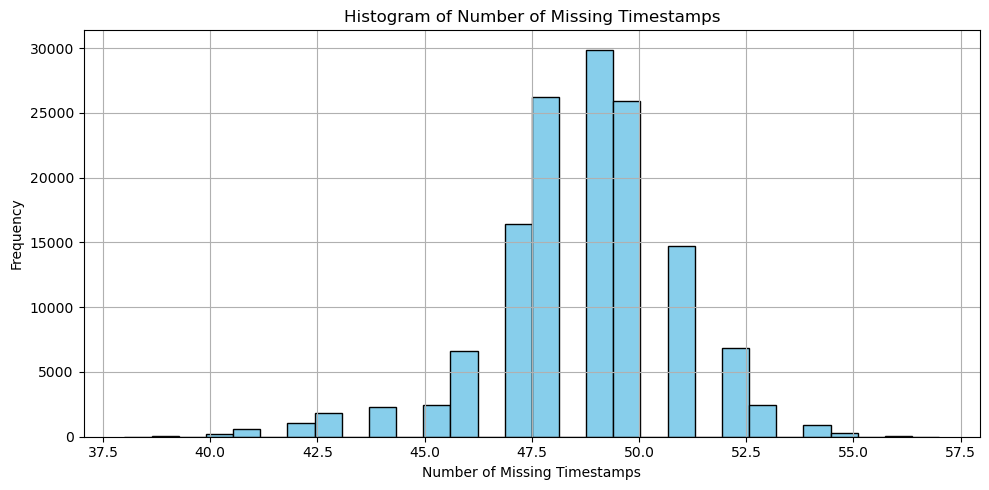

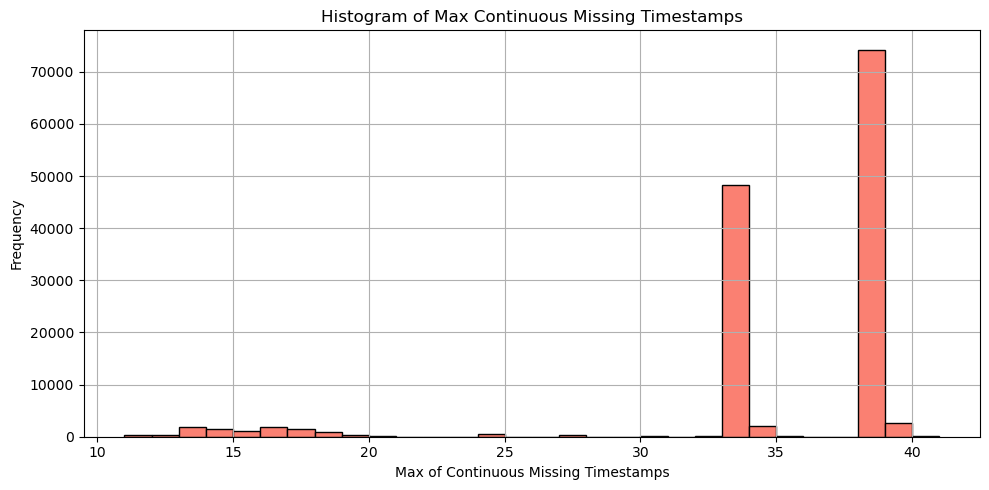

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file
df = pd.read_csv('Karnataka_Datasets/Across/S2_Chunk_Data/Karnataka_Merged_S2.csv')

# Plot histogram for 'Number of Missing Timestamps'
plt.figure(figsize=(10, 5))
plt.hist(df['Number of Missing Timestamps'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Missing Timestamps')
plt.xlabel('Number of Missing Timestamps')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot histogram for 'Max of Continuous Missing Timestamps'
plt.figure(figsize=(10, 5))
plt.hist(df['Max of Continuous Missing Timestamps'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Max Continuous Missing Timestamps')
plt.xlabel('Max of Continuous Missing Timestamps')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
